In [101]:
def sort_tensor(tensor):
    # For each row in the tensor, move the column with the highest value to the front
    new_tensor = tensor.clone()
    for i in range(tensor.shape[0]):
        row = new_tensor[i, :]
        max_index = row[:].argmin().item()
        max_col = tensor[:, max_index]

        for j in range(tensor.shape[0]):
            new_tensor[j, i] = max_col[j].item()
    return new_tensor[:, :tensor.shape[0]]

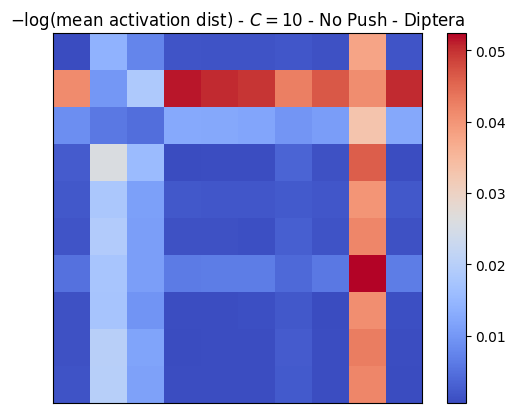

In [104]:
import torch

import matplotlib.pyplot as plt

# Sample 2D tensor
# 1000 - No push - Single Species
# tensor = torch.tensor([[4.3080e-01, 3.4434e-01, 3.3905e-01, 7.0899e-02, 4.3098e-01, 2.9536e-01,
#          6.3323e-02, 3.1288e-01, 6.0754e-02, 3.8566e-01],
#         [1.1472e-01, 7.3201e-02, 7.0681e-02, 1.3454e-02, 1.1542e-01, 5.1752e-02,
#          1.6844e-02, 6.0909e-02, 1.8196e-02, 9.2956e-02],
#         [1.0729e-02, 2.2890e-02, 2.3751e-02, 2.2428e-01, 1.0696e-02, 3.5175e-02,
#          2.4110e-01, 3.5012e-02, 2.4727e-01, 1.5469e-02],
#         [1.4586e-01, 2.0367e-01, 2.0904e-01, 6.2910e-01, 1.4545e-01, 2.4507e-01,
#          6.5747e-01, 2.3364e-01, 6.6781e-01, 1.7375e-01],
#         [5.8892e-02, 3.0686e-02, 2.9875e-02, 4.0402e-02, 5.9102e-02, 1.8423e-02,
#          4.7385e-02, 2.3806e-02, 5.0066e-02, 4.3617e-02],
#         [1.5189e-02, 4.2070e-03, 4.0675e-03, 9.7255e-02, 1.5228e-02, 2.8531e-03,
#          1.0855e-01, 8.5617e-03, 1.1271e-01, 8.8820e-03],
#         [1.6729e-01, 1.1988e-01, 1.1700e-01, 2.9998e-02, 1.6798e-01, 9.4485e-02,
#          3.1811e-02, 1.0144e-01, 3.2694e-02, 1.4168e-01],
#         [3.9222e-02, 6.2947e-02, 6.4437e-02, 3.2720e-01, 3.7830e-02, 8.3407e-02,
#          3.4728e-01, 7.9920e-02, 3.5456e-01, 4.8566e-02],
#         [9.7981e-03, 9.2218e-04, 1.2037e-03, 1.0281e-01, 9.9140e-03, 6.2033e-04,
#          1.1455e-01, 4.6161e-03, 1.1889e-01, 4.3213e-03],
#         [3.1041e-01, 2.3881e-01, 2.3618e-01, 3.3066e-02, 3.1125e-01, 1.9856e-01,
#          2.8981e-02, 2.0866e-01, 2.7654e-02, 2.7310e-01],
#         [1.6156e-01, 1.1759e-01, 1.1650e-01, 3.9914e-02, 1.6253e-01, 9.3558e-02,
#          4.2342e-02, 9.6530e-02, 4.3404e-02, 1.3775e-01],
#         [7.8373e-02, 5.8636e-02, 6.1246e-02, 1.0355e-01, 7.9167e-02, 5.0784e-02,
#          1.1236e-01, 4.8858e-02, 1.1574e-01, 6.7452e-02],
#         [1.4345e-01, 9.5446e-02, 9.3603e-02, 5.8371e-03, 1.4424e-01, 7.0531e-02,
#          7.7271e-03, 8.1404e-02, 8.5386e-03, 1.1863e-01],
#         [1.6783e-04, 5.4318e-03, 6.7934e-03, 1.7619e-01, 2.2251e-05, 1.3951e-02,
#          1.9146e-01, 1.4016e-02, 1.9708e-01, 1.5274e-03],
#         [1.6783e-04, 5.4318e-03, 6.7934e-03, 1.7619e-01, 2.2251e-05, 1.3951e-02,
#          1.9146e-01, 1.4016e-02, 1.9708e-01, 1.5274e-03],
#         [1.6783e-04, 5.4318e-03, 6.7934e-03, 1.7619e-01, 2.2251e-05, 1.3951e-02,
#          1.9146e-01, 1.4016e-02, 1.9708e-01, 1.5274e-03],
#         [5.2943e-04, 6.7885e-03, 8.2735e-03, 1.8320e-01, 2.9323e-04, 1.6062e-02,
#          1.9876e-01, 1.5992e-02, 2.0449e-01, 2.3700e-03],
#         [4.3764e-02, 2.2812e-02, 2.1992e-02, 6.2025e-02, 4.4522e-02, 1.4198e-02,
#          7.0510e-02, 1.8205e-02, 7.3693e-02, 3.2361e-02],
#         [4.8120e-02, 5.9157e-02, 6.0924e-02, 2.5532e-01, 4.7083e-02, 7.0435e-02,
#          2.7187e-01, 6.2687e-02, 2.7791e-01, 5.0320e-02],
#         [8.1452e-02, 4.8552e-02, 4.8010e-02, 3.3131e-02, 8.1562e-02, 3.3018e-02,
#          3.8850e-02, 3.8769e-02, 4.0991e-02, 6.3489e-02],
#         [1.1494e-02, 1.6557e-03, 2.1516e-03, 9.7520e-02, 1.1714e-02, 4.9593e-04,
#          1.0895e-01, 3.6301e-03, 1.1318e-01, 5.4799e-03],
#         [1.2068e-01, 1.6783e-01, 1.7138e-01, 5.4421e-01, 1.2048e-01, 2.0327e-01,
#          5.7007e-01, 2.0035e-01, 5.7954e-01, 1.4370e-01],
#         [1.2441e-01, 1.7823e-01, 1.8219e-01, 5.8422e-01, 1.2362e-01, 2.1698e-01,
#          6.1158e-01, 2.0556e-01, 6.2157e-01, 1.4931e-01],
#         [8.0646e-02, 4.8645e-02, 4.7228e-02, 3.5040e-02, 8.1113e-02, 3.3190e-02,
#          4.0813e-02, 3.9441e-02, 4.3028e-02, 6.3170e-02],
#         [1.8922e-01, 1.3287e-01, 1.2965e-01, 3.2363e-03, 1.8988e-01, 1.0268e-01,
#          3.0677e-03, 1.1721e-01, 3.1099e-03, 1.6027e-01],
#         [1.6783e-04, 5.4318e-03, 6.7934e-03, 1.7619e-01, 2.2251e-05, 1.3951e-02,
#          1.9146e-01, 1.4016e-02, 1.9708e-01, 1.5274e-03],
#         [1.6783e-04, 5.4318e-03, 6.7934e-03, 1.7619e-01, 2.2251e-05, 1.3951e-02,
#          1.9146e-01, 1.4016e-02, 1.9708e-01, 1.5274e-03],
#         [1.6783e-04, 5.4318e-03, 6.7934e-03, 1.7619e-01, 2.2251e-05, 1.3951e-02,
#          1.9146e-01, 1.4016e-02, 1.9708e-01, 1.5274e-03],
#         [3.7343e-01, 2.9329e-01, 2.9100e-01, 5.0108e-02, 3.7409e-01, 2.4862e-01,
#          4.4137e-02, 2.6291e-01, 4.2101e-02, 3.3227e-01],
#         [1.7894e-02, 1.0699e-02, 1.3089e-02, 1.1993e-01, 1.7875e-02, 1.1202e-02,
#          1.3205e-01, 1.0144e-02, 1.3655e-01, 1.2830e-02],
#         [5.3325e-02, 2.9356e-02, 2.9028e-02, 5.7406e-02, 5.3039e-02, 1.9229e-02,
#          6.5323e-02, 2.2213e-02, 6.8291e-02, 3.9230e-02],
#         [1.9074e-02, 8.2600e-03, 9.8078e-03, 1.0167e-01, 1.8908e-02, 6.8916e-03,
#          1.1299e-01, 8.4392e-03, 1.1718e-01, 1.2302e-02],
#         [1.5961e-01, 1.0812e-01, 1.0524e-01, 3.9727e-03, 1.5997e-01, 8.1228e-02,
#          5.1233e-03, 9.4817e-02, 5.6251e-03, 1.3281e-01],
#         [1.6783e-04, 5.4318e-03, 6.7934e-03, 1.7619e-01, 2.2251e-05, 1.3951e-02,
#          1.9146e-01, 1.4016e-02, 1.9708e-01, 1.5274e-03],
#         [1.8521e-01, 1.2950e-01, 1.2646e-01, 2.5651e-03, 1.8598e-01, 9.9573e-02,
#          2.5201e-03, 1.1208e-01, 2.6357e-03, 1.5647e-01],
#         [1.6783e-04, 5.4309e-03, 6.7924e-03, 1.7618e-01, 2.2253e-05, 1.3949e-02,
#          1.9145e-01, 1.4013e-02, 1.9708e-01, 1.5270e-03],
#         [6.4238e-03, 4.7726e-04, 1.3648e-03, 1.1608e-01, 6.4801e-03, 1.8655e-03,
#          1.2852e-01, 3.8794e-03, 1.3312e-01, 2.2573e-03],
#         [5.8619e-03, 1.1320e-04, 6.5172e-04, 1.1688e-01, 5.9205e-03, 1.6743e-03,
#          1.2938e-01, 4.3801e-03, 1.3400e-01, 1.8536e-03],
#         [1.8547e-03, 9.0010e-04, 1.8290e-03, 1.4115e-01, 1.8286e-03, 5.4886e-03,
#          1.5485e-01, 6.9727e-03, 1.5991e-01, 1.8119e-04],
#         [9.9420e-01, 8.5850e-01, 8.5005e-01, 3.3765e-01, 9.9676e-01, 7.7792e-01,
#          3.1738e-01, 8.1015e-01, 3.1018e-01, 9.2680e-01]],).T

# 1000 no push diptera
tensor = torch.tensor([[6.8828e-04, 4.0717e-02, 8.9628e-03, 2.4835e-03, 2.1417e-03, 1.6756e-03,
         4.9672e-03, 1.2373e-03, 1.3892e-03, 1.5572e-03],
        [5.0933e-02, 8.5207e-02, 5.9077e-02, 5.6099e-02, 5.3665e-02, 5.4692e-02,
         6.2804e-02, 5.3890e-02, 5.6260e-02, 5.6783e-02],
        [3.6710e-01, 6.3799e-01, 4.5869e-01, 3.1491e-01, 3.5224e-01, 3.4480e-01,
         3.7698e-01, 3.5051e-01, 3.3762e-01, 3.3997e-01],
        [3.7376e-02, 4.0092e-02, 3.2264e-02, 4.5651e-02, 3.9572e-02, 4.1261e-02,
         5.1695e-02, 4.0295e-02, 4.2385e-02, 4.1402e-02],
        [8.1402e-02, 4.4880e-02, 6.3109e-02, 9.7764e-02, 8.3464e-02, 8.5412e-02,
         7.9872e-02, 8.6387e-02, 9.0648e-02, 9.0033e-02],
        [5.7465e-02, 1.1794e-01, 6.9886e-02, 5.6563e-02, 5.7055e-02, 5.8681e-02,
         5.9424e-02, 5.8916e-02, 5.7630e-02, 5.6410e-02],
        [4.6415e-02, 5.7885e-02, 4.4798e-02, 5.7983e-02, 5.2313e-02, 5.0155e-02,
         4.3080e-02, 5.0059e-02, 5.3279e-02, 5.0837e-02],
        [5.0811e-02, 1.0876e-01, 5.0040e-02, 4.8526e-02, 5.3014e-02, 4.7558e-02,
         6.0777e-02, 4.9810e-02, 4.9458e-02, 4.9643e-02],
        [3.0160e-02, 6.5657e-02, 2.9335e-02, 3.2850e-02, 3.1134e-02, 3.0090e-02,
         3.4303e-02, 2.8711e-02, 3.0350e-02, 2.9782e-02],
        [9.9603e-02, 1.0366e-01, 9.8605e-02, 1.0715e-01, 9.4885e-02, 1.0078e-01,
         1.0636e-01, 1.0170e-01, 1.0430e-01, 1.0261e-01],
        [5.5130e-02, 1.0188e-01, 6.8669e-02, 5.4431e-02, 5.5627e-02, 5.5778e-02,
         5.9799e-02, 5.3800e-02, 5.2465e-02, 5.3245e-02],
        [1.4095e-01, 2.2742e-01, 1.6589e-01, 1.2516e-01, 1.3822e-01, 1.3607e-01,
         1.4715e-01, 1.3602e-01, 1.3422e-01, 1.3328e-01],
        [8.5837e-02, 1.2148e-01, 9.3728e-02, 8.2432e-02, 8.2439e-02, 8.1887e-02,
         9.7644e-02, 8.5135e-02, 8.6273e-02, 8.6350e-02],
        [3.6866e-02, 8.2679e-02, 4.6285e-02, 3.7294e-02, 4.1431e-02, 3.6579e-02,
         4.7917e-02, 3.4696e-02, 3.6221e-02, 3.4461e-02],
        [7.6002e-03, 1.8239e-02, 4.7328e-03, 1.5641e-02, 1.1089e-02, 1.0992e-02,
         1.1005e-02, 9.5532e-03, 1.1646e-02, 1.1260e-02],
        [1.2609e-03, 3.5212e-02, 6.9056e-03, 3.8825e-03, 2.2160e-03, 2.3161e-03,
         5.5703e-03, 1.6596e-03, 2.3522e-03, 2.3669e-03],
        [4.3241e-02, 7.3065e-02, 4.2790e-02, 4.6237e-02, 4.1821e-02, 4.4128e-02,
         4.7570e-02, 4.5055e-02, 4.3834e-02, 4.5107e-02],
        [5.9935e-02, 8.6681e-02, 7.1338e-02, 6.7409e-02, 6.5818e-02, 6.7338e-02,
         6.5637e-02, 6.2514e-02, 6.4099e-02, 6.7938e-02],
        [3.9824e-02, 7.9531e-02, 4.9288e-02, 4.0934e-02, 4.0529e-02, 4.0965e-02,
         4.1377e-02, 3.8297e-02, 3.9614e-02, 3.7880e-02],
        [9.1429e-04, 4.0160e-02, 8.4403e-03, 2.3447e-03, 1.9247e-03, 1.5170e-03,
         5.4737e-03, 9.9012e-04, 1.3095e-03, 1.3450e-03],
        [1.5513e-03, 4.9308e-02, 1.2239e-02, 9.0501e-04, 1.8858e-03, 1.0433e-03,
         6.4498e-03, 9.9871e-04, 8.5999e-04, 9.5606e-04],
        [6.4955e-01, 9.9703e-01, 7.6894e-01, 5.7963e-01, 6.2944e-01, 6.1967e-01,
         6.6120e-01, 6.2745e-01, 6.1018e-01, 6.1331e-01],
        [1.4669e-03, 4.8793e-02, 1.2205e-02, 1.0959e-03, 2.0183e-03, 1.3210e-03,
         6.2111e-03, 1.0524e-03, 8.7933e-04, 1.0249e-03],
        [1.5020e-01, 3.3692e-01, 2.1121e-01, 1.1752e-01, 1.4118e-01, 1.3617e-01,
         1.5794e-01, 1.3969e-01, 1.3149e-01, 1.3307e-01],
        [1.9729e-03, 4.2659e-02, 1.0276e-02, 3.4421e-03, 2.3456e-03, 2.9071e-03,
         4.0872e-03, 2.1083e-03, 2.4776e-03, 2.3248e-03],
        [1.3377e-01, 1.2213e-01, 1.2243e-01, 1.5065e-01, 1.3820e-01, 1.3723e-01,
         1.2481e-01, 1.3961e-01, 1.4443e-01, 1.3890e-01],
        [9.0067e-02, 1.6831e-01, 1.1424e-01, 8.2494e-02, 8.7611e-02, 8.8541e-02,
         8.6804e-02, 9.0117e-02, 8.3394e-02, 8.5089e-02],
        [4.7593e-02, 7.2253e-02, 5.0733e-02, 5.4875e-02, 5.2757e-02, 4.9411e-02,
         5.4005e-02, 4.9668e-02, 4.9994e-02, 5.3065e-02],
        [1.2721e-03, 4.6287e-02, 1.1096e-02, 1.3483e-03, 1.9429e-03, 1.3955e-03,
         5.7742e-03, 6.0551e-04, 8.9450e-04, 8.8823e-04],
        [9.8757e-04, 3.9201e-02, 8.0131e-03, 2.6594e-03, 2.0013e-03, 1.6858e-03,
         5.4452e-03, 1.0099e-03, 1.5468e-03, 1.5469e-03],
        [1.1936e-01, 2.2614e-01, 1.4999e-01, 1.0464e-01, 1.1447e-01, 1.1355e-01,
         1.3137e-01, 1.1338e-01, 1.1050e-01, 1.1303e-01],
        [1.4162e-02, 9.7324e-03, 5.7935e-03, 2.5759e-02, 1.8225e-02, 1.9089e-02,
         1.7636e-02, 1.7435e-02, 2.0174e-02, 1.9814e-02],
        [1.0913e-01, 2.0374e-01, 1.2762e-01, 1.0295e-01, 1.0673e-01, 1.0336e-01,
         1.2366e-01, 1.0878e-01, 1.0279e-01, 1.0739e-01],
        [1.6214e-03, 5.1037e-02, 1.2929e-02, 6.7224e-04, 1.9828e-03, 1.2541e-03,
         6.3007e-03, 9.1559e-04, 6.6116e-04, 8.2016e-04],
        [6.9394e-02, 9.8103e-02, 7.6731e-02, 6.8904e-02, 6.3836e-02, 6.6583e-02,
         6.4043e-02, 6.6839e-02, 6.9258e-02, 6.7856e-02],
        [9.4223e-02, 1.9166e-01, 1.1385e-01, 8.0189e-02, 8.9854e-02, 8.8584e-02,
         1.0369e-01, 8.9808e-02, 8.5808e-02, 8.8098e-02],
        [1.7515e-03, 5.0153e-02, 1.2774e-02, 9.1074e-04, 2.0762e-03, 1.2594e-03,
         6.4407e-03, 1.0363e-03, 9.0261e-04, 5.8729e-04],
        [1.3638e-01, 2.1476e-01, 1.6445e-01, 1.3559e-01, 1.3598e-01, 1.3958e-01,
         1.4593e-01, 1.3966e-01, 1.3570e-01, 1.3263e-01],
        [1.5145e-03, 4.9990e-02, 1.2592e-02, 8.2186e-04, 1.8683e-03, 1.2296e-03,
         6.3135e-03, 9.2011e-04, 7.9227e-04, 9.0051e-04],
        [1.2881e-01, 2.0223e-01, 1.5300e-01, 1.2144e-01, 1.2006e-01, 1.2127e-01,
         1.2967e-01, 1.2657e-01, 1.2384e-01, 1.2579e-01]])

# parallel_new_backbone_10epoch_init_067 - Push Diptera
tensor = torch.tensor([[0.0244, 0.1514, 0.0751, 0.4053, 0.3010, 0.3167, 0.3825, 0.2331, 0.1513,
         0.1234],
        [0.1133, 0.0996, 0.1026, 0.1897, 0.1340, 0.1414, 0.1608, 0.1023, 0.0721,
         0.0678],
        [0.0857, 0.0276, 0.0609, 0.0824, 0.0384, 0.0446, 0.0784, 0.0188, 0.0045,
         0.0060],
        [0.2762, 0.1019, 0.2189, 0.0334, 0.0268, 0.0292, 0.0401, 0.0363, 0.0636,
         0.0854],
        [0.2467, 0.0784, 0.1834, 0.0148, 0.0069, 0.0092, 0.0210, 0.0147, 0.0433,
         0.0606],
        [0.0701, 0.1085, 0.0850, 0.3015, 0.2259, 0.2265, 0.2938, 0.1683, 0.1182,
         0.1066],
        [0.2505, 0.0818, 0.1860, 0.0262, 0.0172, 0.0200, 0.0353, 0.0247, 0.0511,
         0.0685],
        [0.1926, 0.0692, 0.1512, 0.0512, 0.0265, 0.0343, 0.0521, 0.0224, 0.0367,
         0.0468],
        [0.2212, 0.0733, 0.1662, 0.0277, 0.0160, 0.0193, 0.0344, 0.0199, 0.0397,
         0.0544],
        [0.0916, 0.0536, 0.0805, 0.1444, 0.0892, 0.0934, 0.1242, 0.0635, 0.0401,
         0.0321],
        [0.0839, 0.0653, 0.0901, 0.1706, 0.1090, 0.1208, 0.1540, 0.0788, 0.0448,
         0.0396],
        [0.1773, 0.0597, 0.1401, 0.0437, 0.0263, 0.0312, 0.0510, 0.0191, 0.0309,
         0.0376],
        [0.0508, 0.0562, 0.0579, 0.1906, 0.1235, 0.1337, 0.1822, 0.0817, 0.0476,
         0.0342],
        [0.0528, 0.0472, 0.0479, 0.1657, 0.0995, 0.1125, 0.1499, 0.0721, 0.0342,
         0.0291],
        [0.2208, 0.0801, 0.1690, 0.0404, 0.0212, 0.0273, 0.0439, 0.0254, 0.0454,
         0.0589],
        [0.1582, 0.0668, 0.1211, 0.0727, 0.0435, 0.0490, 0.0761, 0.0359, 0.0355,
         0.0441],
        [0.1429, 0.0602, 0.1048, 0.0992, 0.0579, 0.0605, 0.0910, 0.0445, 0.0410,
         0.0460],
        [0.1165, 0.0363, 0.0838, 0.0755, 0.0384, 0.0419, 0.0725, 0.0222, 0.0155,
         0.0180],
        [0.0638, 0.0574, 0.0586, 0.1689, 0.1043, 0.1128, 0.1609, 0.0756, 0.0384,
         0.0343],
        [0.2008, 0.0699, 0.1532, 0.0573, 0.0330, 0.0363, 0.0603, 0.0305, 0.0386,
         0.0561],
        [0.1267, 0.0501, 0.0989, 0.0817, 0.0458, 0.0504, 0.0730, 0.0310, 0.0246,
         0.0247],
        [0.2798, 0.0935, 0.2087, 0.0107, 0.0081, 0.0098, 0.0185, 0.0208, 0.0564,
         0.0763],
        [0.1227, 0.0530, 0.0998, 0.0953, 0.0487, 0.0542, 0.0811, 0.0339, 0.0255,
         0.0328],
        [0.3018, 0.1045, 0.2266, 0.0103, 0.0111, 0.0126, 0.0192, 0.0267, 0.0664,
         0.0879],
        [0.2271, 0.0667, 0.1793, 0.0397, 0.0242, 0.0264, 0.0457, 0.0260, 0.0468,
         0.0622],
        [0.2308, 0.0743, 0.1716, 0.0308, 0.0202, 0.0245, 0.0412, 0.0240, 0.0426,
         0.0620],
        [0.1308, 0.0631, 0.1015, 0.0928, 0.0529, 0.0668, 0.0831, 0.0422, 0.0299,
         0.0333],
        [0.1715, 0.0909, 0.1372, 0.1093, 0.0745, 0.0734, 0.0895, 0.0606, 0.0540,
         0.0656],
        [0.1887, 0.0702, 0.1416, 0.0714, 0.0400, 0.0475, 0.0766, 0.0384, 0.0474,
         0.0559],
        [0.1444, 0.0550, 0.1107, 0.0760, 0.0383, 0.0454, 0.0696, 0.0238, 0.0260,
         0.0334],
        [0.2369, 0.0800, 0.1775, 0.0309, 0.0170, 0.0215, 0.0371, 0.0210, 0.0468,
         0.0640],
        [0.1182, 0.0571, 0.0974, 0.1001, 0.0629, 0.0685, 0.1063, 0.0395, 0.0332,
         0.0354],
        [0.0216, 0.1205, 0.0659, 0.3557, 0.2610, 0.2750, 0.3401, 0.2005, 0.1243,
         0.0996],
        [0.0561, 0.0827, 0.0565, 0.2395, 0.1648, 0.1740, 0.2289, 0.1251, 0.0729,
         0.0655],
        [0.1119, 0.0682, 0.0841, 0.1238, 0.0807, 0.0860, 0.1217, 0.0551, 0.0374,
         0.0422],
        [0.1149, 0.0920, 0.0916, 0.1756, 0.1288, 0.1330, 0.1647, 0.0972, 0.0671,
         0.0700],
        [0.1887, 0.0759, 0.1312, 0.0657, 0.0418, 0.0440, 0.0729, 0.0363, 0.0447,
         0.0533],
        [0.1087, 0.0499, 0.0790, 0.1253, 0.0771, 0.0778, 0.1172, 0.0554, 0.0377,
         0.0401],
        [0.2150, 0.0666, 0.1644, 0.0398, 0.0203, 0.0250, 0.0440, 0.0188, 0.0380,
         0.0549],
        [0.0860, 0.0524, 0.0707, 0.1286, 0.0799, 0.0846, 0.1230, 0.0513, 0.0282,
         0.0266]])

tensor1 = torch.tensor([[0.0015, 0.1696, 0.1337, 0.2460, 0.2211, 0.2424, 0.2243, 0.2387, 0.1202,
         0.0674],
        [0.0028, 0.1595, 0.1277, 0.2321, 0.2086, 0.2298, 0.2118, 0.2244, 0.1123,
         0.0612],
        [0.1440, 0.0359, 0.0294, 0.0203, 0.0141, 0.0194, 0.0236, 0.0184, 0.0070,
         0.0241],
        [0.2348, 0.0441, 0.0585, 0.0330, 0.0294, 0.0334, 0.0545, 0.0342, 0.0466,
         0.0753],
        [0.1689, 0.0532, 0.0608, 0.0502, 0.0388, 0.0434, 0.0472, 0.0513, 0.0366,
         0.0534],
        [0.0999, 0.0749, 0.0461, 0.0666, 0.0556, 0.0667, 0.0672, 0.0660, 0.0280,
         0.0245],
        [0.3320, 0.1023, 0.1060, 0.0367, 0.0386, 0.0310, 0.0477, 0.0341, 0.0748,
         0.1221],
        [0.3593, 0.1176, 0.0964, 0.0609, 0.0643, 0.0539, 0.0812, 0.0622, 0.1025,
         0.1523],
        [0.2899, 0.0855, 0.0718, 0.0397, 0.0356, 0.0347, 0.0418, 0.0330, 0.0617,
         0.1029],
        [0.2670, 0.1039, 0.1373, 0.1034, 0.0809, 0.0931, 0.1018, 0.0985, 0.1030,
         0.1236],
        [0.2605, 0.0977, 0.1105, 0.0655, 0.0613, 0.0675, 0.0693, 0.0575, 0.0663,
         0.0989],
        [0.5237, 0.1967, 0.2363, 0.1144, 0.1388, 0.1341, 0.1552, 0.1278, 0.2010,
         0.2664],
        [0.2520, 0.0869, 0.1002, 0.0664, 0.0680, 0.0683, 0.0956, 0.0747, 0.0839,
         0.1101],
        [0.3006, 0.0978, 0.0981, 0.0452, 0.0504, 0.0434, 0.0590, 0.0380, 0.0714,
         0.1084],
        [0.1155, 0.0588, 0.0390, 0.0453, 0.0404, 0.0458, 0.0427, 0.0415, 0.0160,
         0.0213],
        [0.3685, 0.1175, 0.1434, 0.0617, 0.0545, 0.0613, 0.0681, 0.0574, 0.1059,
         0.1595],
        [0.2088, 0.0703, 0.0624, 0.0368, 0.0309, 0.0373, 0.0471, 0.0386, 0.0391,
         0.0676],
        [0.2884, 0.1165, 0.1287, 0.0618, 0.0637, 0.0725, 0.0682, 0.0612, 0.0788,
         0.1256],
        [0.2621, 0.0864, 0.0872, 0.0412, 0.0408, 0.0448, 0.0524, 0.0391, 0.0560,
         0.0889],
        [0.3129, 0.1072, 0.1112, 0.0536, 0.0564, 0.0432, 0.0723, 0.0507, 0.0824,
         0.1252],
        [0.2506, 0.0817, 0.1053, 0.0635, 0.0574, 0.0576, 0.0724, 0.0662, 0.0773,
         0.1012],
        [0.7167, 0.2692, 0.3006, 0.1420, 0.1574, 0.1433, 0.1750, 0.1463, 0.2656,
         0.3688],
        [0.3310, 0.1016, 0.1186, 0.0550, 0.0470, 0.0460, 0.0536, 0.0461, 0.0801,
         0.1369],
        [0.5216, 0.1651, 0.1867, 0.0688, 0.0780, 0.0697, 0.0937, 0.0714, 0.1555,
         0.2353],
        [0.2062, 0.0481, 0.0458, 0.0133, 0.0095, 0.0127, 0.0163, 0.0105, 0.0207,
         0.0513],
        [0.2332, 0.1496, 0.1300, 0.1224, 0.1086, 0.1059, 0.1087, 0.1196, 0.1050,
         0.1101],
        [0.4146, 0.1629, 0.1671, 0.0874, 0.0914, 0.0933, 0.1055, 0.1004, 0.1317,
         0.1914],
        [0.2203, 0.0799, 0.0697, 0.0471, 0.0427, 0.0387, 0.0428, 0.0424, 0.0437,
         0.0787],
        [0.2223, 0.0493, 0.0501, 0.0108, 0.0094, 0.0109, 0.0202, 0.0069, 0.0240,
         0.0574],
        [0.2246, 0.0482, 0.0480, 0.0094, 0.0079, 0.0094, 0.0191, 0.0085, 0.0246,
         0.0588],
        [0.5561, 0.2217, 0.2415, 0.1318, 0.1359, 0.1346, 0.1639, 0.1296, 0.2110,
         0.2886],
        [0.5515, 0.2522, 0.2456, 0.1741, 0.1773, 0.1648, 0.1715, 0.1720, 0.2219,
         0.2977],
        [0.3958, 0.1558, 0.1330, 0.0897, 0.0883, 0.0787, 0.0970, 0.0916, 0.1232,
         0.1861],
        [0.1541, 0.0908, 0.1015, 0.0979, 0.0885, 0.0981, 0.0990, 0.0948, 0.0612,
         0.0698],
        [0.3463, 0.1037, 0.1352, 0.0688, 0.0609, 0.0649, 0.0751, 0.0693, 0.1040,
         0.1493],
        [0.1837, 0.0453, 0.0395, 0.0174, 0.0137, 0.0168, 0.0242, 0.0168, 0.0173,
         0.0420],
        [0.2578, 0.0656, 0.0851, 0.0318, 0.0264, 0.0297, 0.0424, 0.0252, 0.0497,
         0.0769],
        [0.0586, 0.0539, 0.0353, 0.0702, 0.0570, 0.0681, 0.0651, 0.0669, 0.0160,
         0.0059],
        [0.1678, 0.0387, 0.0362, 0.0166, 0.0123, 0.0165, 0.0222, 0.0140, 0.0124,
         0.0348],
        [0.5097, 0.2079, 0.2438, 0.1479, 0.1358, 0.1353, 0.1565, 0.1491, 0.2050,
         0.2718]])

tensor = torch.tensor([[6.9463e-04, 4.1193e-02, 8.8578e-03, 2.4706e-03, 2.1598e-03, 1.6930e-03,
         5.0552e-03, 1.2445e-03, 1.3837e-03, 1.5641e-03],
        [5.0176e-02, 8.2458e-02, 5.6327e-02, 5.5897e-02, 5.3167e-02, 5.4038e-02,
         6.2525e-02, 5.3348e-02, 5.5890e-02, 5.6378e-02],
        [3.6730e-01, 6.3934e-01, 4.5717e-01, 3.1483e-01, 3.5254e-01, 3.4459e-01,
         3.7785e-01, 3.5062e-01, 3.3768e-01, 3.3996e-01],
        [3.7796e-02, 4.0932e-02, 3.2836e-02, 4.6023e-02, 3.9931e-02, 4.1716e-02,
         5.2354e-02, 4.0719e-02, 4.2795e-02, 4.1826e-02],
        [8.3132e-02, 4.5161e-02, 6.4201e-02, 9.9837e-02, 8.5247e-02, 8.7268e-02,
         8.1558e-02, 8.8226e-02, 9.2581e-02, 9.1947e-02],
        [5.8578e-02, 1.1991e-01, 7.0745e-02, 5.7609e-02, 5.8130e-02, 5.9784e-02,
         6.0561e-02, 6.0062e-02, 5.8737e-02, 5.7503e-02],
        [4.7058e-02, 5.7897e-02, 4.5027e-02, 5.8940e-02, 5.3128e-02, 5.0918e-02,
         4.3668e-02, 5.0799e-02, 5.4102e-02, 5.1591e-02],
        [5.1466e-02, 1.0938e-01, 4.9927e-02, 4.9270e-02, 5.3812e-02, 4.8199e-02,
         6.1747e-02, 5.0484e-02, 5.0161e-02, 5.0317e-02],
        [3.0591e-02, 6.6787e-02, 2.9867e-02, 3.3215e-02, 3.1550e-02, 3.0535e-02,
         3.4790e-02, 2.9069e-02, 3.0712e-02, 3.0135e-02],
        [9.8725e-02, 1.0439e-01, 9.9331e-02, 1.0598e-01, 9.3724e-02, 1.0001e-01,
         1.0546e-01, 1.0071e-01, 1.0325e-01, 1.0155e-01],
        [5.4138e-02, 1.0380e-01, 6.9401e-02, 5.2871e-02, 5.4399e-02, 5.4729e-02,
         5.8680e-02, 5.2612e-02, 5.1098e-02, 5.1972e-02],
        [1.3834e-01, 2.3003e-01, 1.6597e-01, 1.2133e-01, 1.3514e-01, 1.3316e-01,
         1.4432e-01, 1.3305e-01, 1.3098e-01, 1.3014e-01],
        [8.6841e-02, 1.2238e-01, 9.3840e-02, 8.3382e-02, 8.3348e-02, 8.2699e-02,
         9.8933e-02, 8.6149e-02, 8.7323e-02, 8.7420e-02],
        [3.6314e-02, 8.4373e-02, 4.6924e-02, 3.6327e-02, 4.0815e-02, 3.5980e-02,
         4.7460e-02, 3.3970e-02, 3.5423e-02, 3.3673e-02],
        [7.6554e-03, 1.8455e-02, 4.6922e-03, 1.5741e-02, 1.1165e-02, 1.1102e-02,
         1.1082e-02, 9.6168e-03, 1.1720e-02, 1.1346e-02],
        [1.2819e-03, 3.5535e-02, 6.7642e-03, 3.9094e-03, 2.2413e-03, 2.3565e-03,
         5.6763e-03, 1.6784e-03, 2.3724e-03, 2.3936e-03],
        [4.3747e-02, 7.3444e-02, 4.2661e-02, 4.6832e-02, 4.2302e-02, 4.4664e-02,
         4.8196e-02, 4.5619e-02, 4.4379e-02, 4.5670e-02],
        [5.9902e-02, 8.8482e-02, 7.2416e-02, 6.7128e-02, 6.5736e-02, 6.7406e-02,
         6.5558e-02, 6.2422e-02, 6.3927e-02, 6.7926e-02],
        [4.0038e-02, 7.8889e-02, 4.8580e-02, 4.1393e-02, 4.0874e-02, 4.1264e-02,
         4.1731e-02, 3.8543e-02, 3.9952e-02, 3.8138e-02],
        [9.3440e-04, 4.0543e-02, 8.2708e-03, 2.3549e-03, 1.9552e-03, 1.5427e-03,
         5.5905e-03, 1.0051e-03, 1.3208e-03, 1.3630e-03],
        [1.5772e-03, 4.9688e-02, 1.1977e-02, 9.1693e-04, 1.9258e-03, 1.0503e-03,
         6.6004e-03, 1.0189e-03, 8.7757e-04, 9.7677e-04],
        [6.4981e-01, 9.9869e-01, 7.6697e-01, 5.7952e-01, 6.2983e-01, 6.1938e-01,
         6.6232e-01, 6.2759e-01, 6.1026e-01, 6.1328e-01],
        [1.4819e-03, 4.9076e-02, 1.1900e-02, 1.1192e-03, 2.0621e-03, 1.3337e-03,
         6.3548e-03, 1.0693e-03, 8.9791e-04, 1.0433e-03],
        [1.5053e-01, 3.3819e-01, 2.1045e-01, 1.1766e-01, 1.4157e-01, 1.3624e-01,
         1.5873e-01, 1.3995e-01, 1.3173e-01, 1.3326e-01],
        [1.9249e-03, 4.2543e-02, 9.7977e-03, 3.4875e-03, 2.3460e-03, 2.9081e-03,
         4.1259e-03, 2.0855e-03, 2.4805e-03, 2.3090e-03],
        [1.3584e-01, 1.2323e-01, 1.2419e-01, 1.5312e-01, 1.4040e-01, 1.3945e-01,
         1.2668e-01, 1.4181e-01, 1.4675e-01, 1.4107e-01],
        [8.8448e-02, 1.6484e-01, 1.1048e-01, 8.1325e-02, 8.6230e-02, 8.6971e-02,
         8.5385e-02, 8.8700e-02, 8.1987e-02, 8.3633e-02],
        [4.7216e-02, 7.0878e-02, 4.9804e-02, 5.4855e-02, 5.2632e-02, 4.9216e-02,
         5.3884e-02, 4.9388e-02, 4.9775e-02, 5.2862e-02],
        [1.2972e-03, 4.6654e-02, 1.0868e-02, 1.3657e-03, 1.9861e-03, 1.4195e-03,
         5.9098e-03, 6.1819e-04, 9.1193e-04, 9.0639e-04],
        [1.0095e-03, 3.9553e-02, 7.8234e-03, 2.6792e-03, 2.0343e-03, 1.7152e-03,
         5.5622e-03, 1.0262e-03, 1.5651e-03, 1.5711e-03],
        [1.2006e-01, 2.3002e-01, 1.5172e-01, 1.0471e-01, 1.1491e-01, 1.1407e-01,
         1.3223e-01, 1.1386e-01, 1.1085e-01, 1.1347e-01],
        [1.4119e-02, 9.9299e-03, 5.8894e-03, 2.5753e-02, 1.8175e-02, 1.9132e-02,
         1.7577e-02, 1.7402e-02, 2.0142e-02, 1.9805e-02],
        [1.0960e-01, 2.0367e-01, 1.2678e-01, 1.0371e-01, 1.0736e-01, 1.0381e-01,
         1.2469e-01, 1.0938e-01, 1.0335e-01, 1.0799e-01],
        [1.6454e-03, 5.1411e-02, 1.2661e-02, 6.8450e-04, 2.0270e-03, 1.2671e-03,
         6.4487e-03, 9.3269e-04, 6.7564e-04, 8.3674e-04],
        [7.0763e-02, 9.8821e-02, 7.7242e-02, 7.0376e-02, 6.5123e-02, 6.7871e-02,
         6.5331e-02, 6.8191e-02, 7.0699e-02, 6.9257e-02],
        [9.1341e-02, 1.9373e-01, 1.1302e-01, 7.6223e-02, 8.6504e-02, 8.5366e-02,
         1.0070e-01, 8.6611e-02, 8.2316e-02, 8.4790e-02],
        [1.7655e-03, 5.0434e-02, 1.2465e-02, 9.2897e-04, 2.1164e-03, 1.2656e-03,
         6.5846e-03, 1.0467e-03, 9.1692e-04, 5.8939e-04],
        [1.3494e-01, 2.1107e-01, 1.6071e-01, 1.3484e-01, 1.3487e-01, 1.3832e-01,
         1.4505e-01, 1.3852e-01, 1.3467e-01, 1.3142e-01],
        [1.5439e-03, 5.0409e-02, 1.2372e-02, 8.3262e-04, 1.9115e-03, 1.2494e-03,
         6.4639e-03, 9.4108e-04, 8.1015e-04, 9.2090e-04],
        [1.3069e-01, 2.0621e-01, 1.5553e-01, 1.2289e-01, 1.2160e-01, 1.2283e-01,
         1.3145e-01, 1.2833e-01, 1.2545e-01, 1.2752e-01]])

tensor = tensor.T

tensor = -torch.log(tensor)
tensor = sort_tensor(tensor)
# Plot correlation matrix
plt.imshow(tensor, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('$-\log(\\text{mean activation dist})$ - $C = 10$ - No Push - Diptera')
plt.ylabel('Image Prototype $v_i$')
plt.xlabel('Genetic Prototype $g_i$')
# Hide the axes
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()